# Oculométrie et attention visuelle

Bienvenu dans ce notebook dédié à l'étude des données d'oculométrie et aux modèles d'attention visuelle.

## Un peu d'intuition

Exécutez le code ci-dessous qui affiche simplement les différentes images (stimuli) qui ont été visualisées par des observateurs / fournies en entrée de modèles d'attention.

<IPython.core.display.Javascript object>


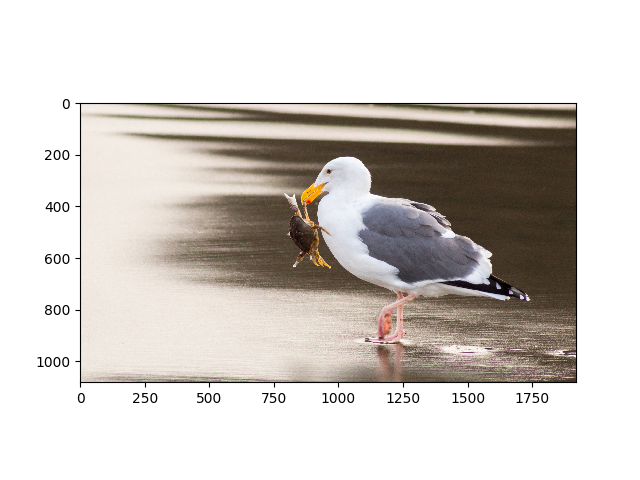

<IPython.core.display.Javascript object>


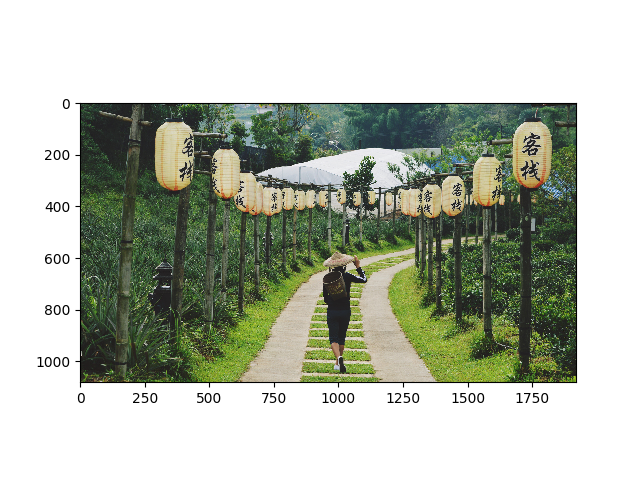

<IPython.core.display.Javascript object>


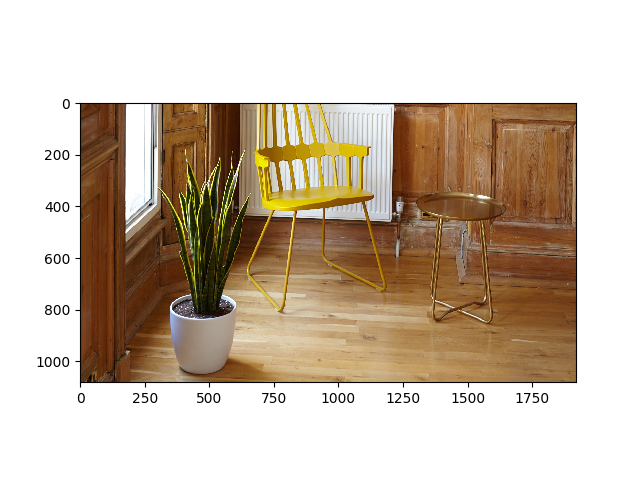

<IPython.core.display.Javascript object>


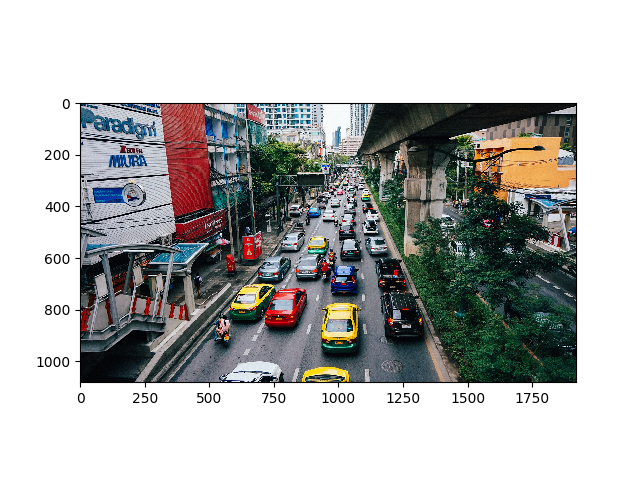

<IPython.core.display.Javascript object>


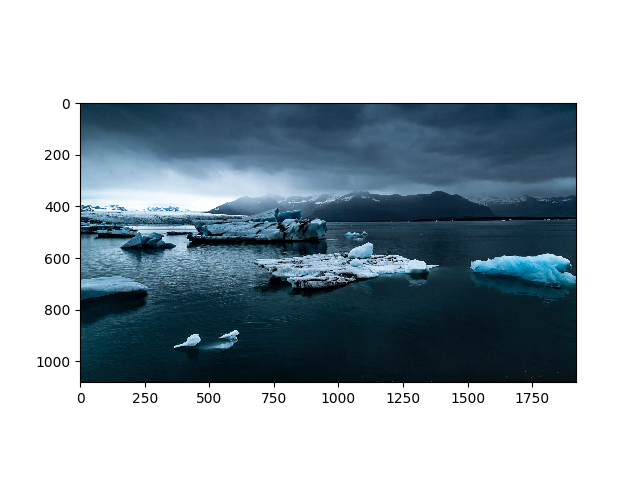

<IPython.core.display.Javascript object>


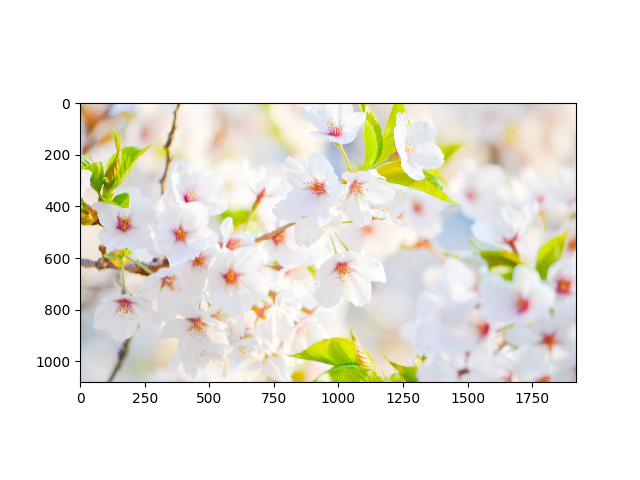

<IPython.core.display.Javascript object>


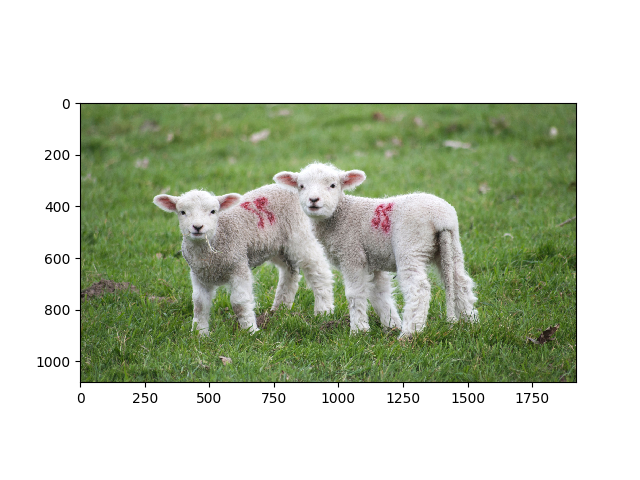

<IPython.core.display.Javascript object>


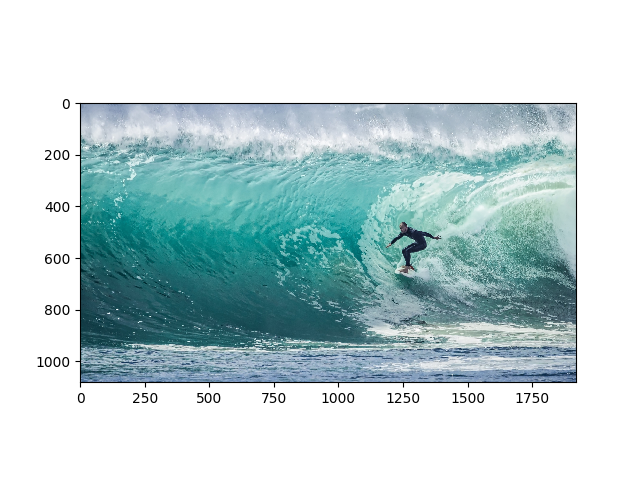

<IPython.core.display.Javascript object>


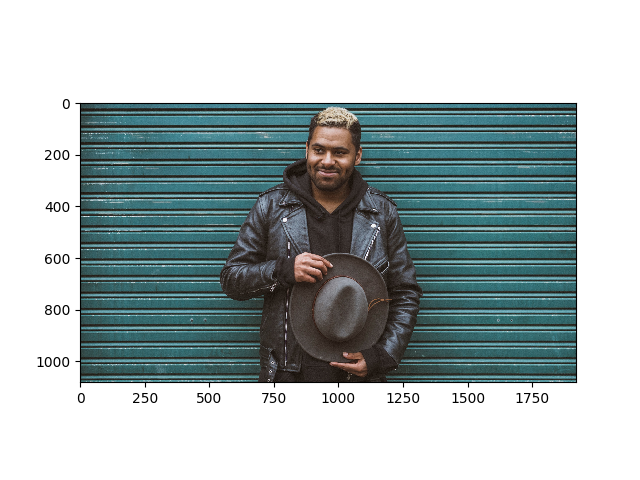

<IPython.core.display.Javascript object>


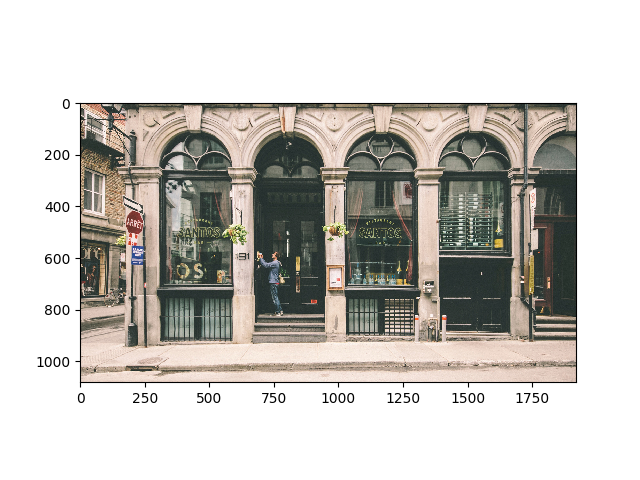

<IPython.core.display.Javascript object>


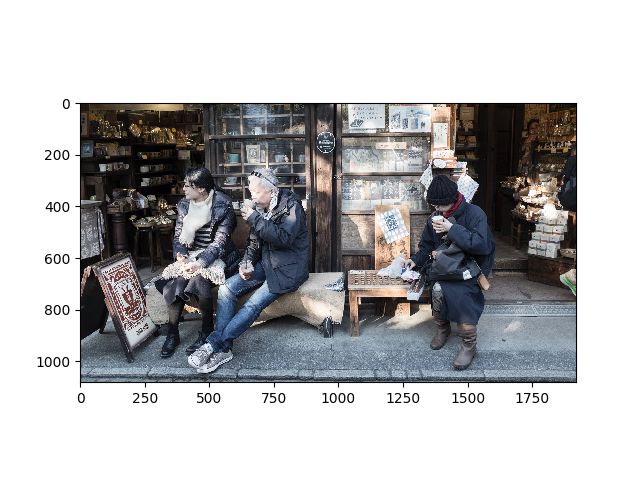

In [2]:
%matplotlib notebook

import warnings
import matplotlib.pyplot as plt
import skimage.io as io

for i in range(1,12):
    img=io.imread("Stimuli/img"+str(i)+".jpg")
    plt.figure()
    plt.imshow(img)

**Question 1:** A votre avis, quels sont les élements de chaque image qui vont attirer le regard des observateurs ?

**Réponse 1:**

## Observons la vérité terrain

Le script suivant affiche en plus des images (stimuli) les cartes de saillance construites à partir des données oculométriques des observateurs.

<IPython.core.display.Javascript object>


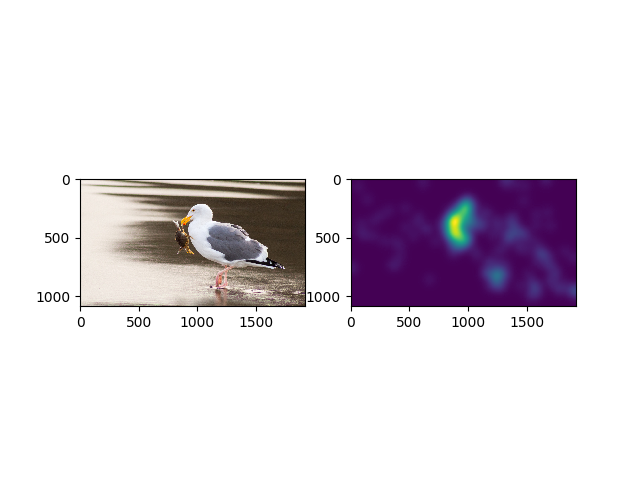

<IPython.core.display.Javascript object>


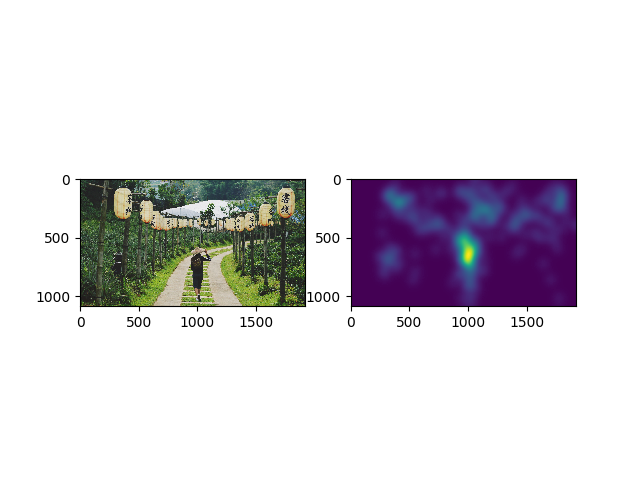

<IPython.core.display.Javascript object>


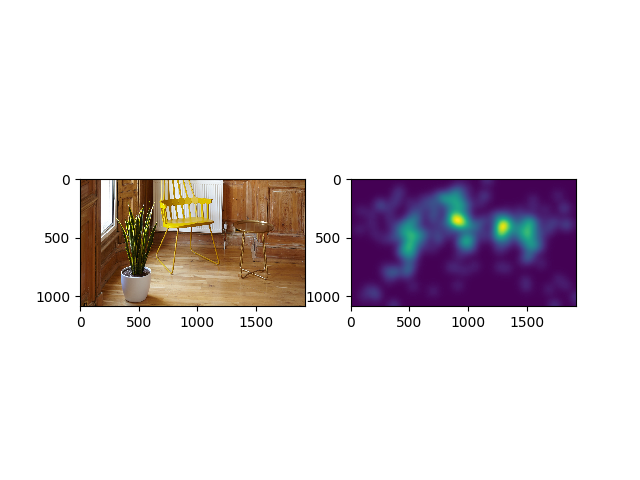

<IPython.core.display.Javascript object>


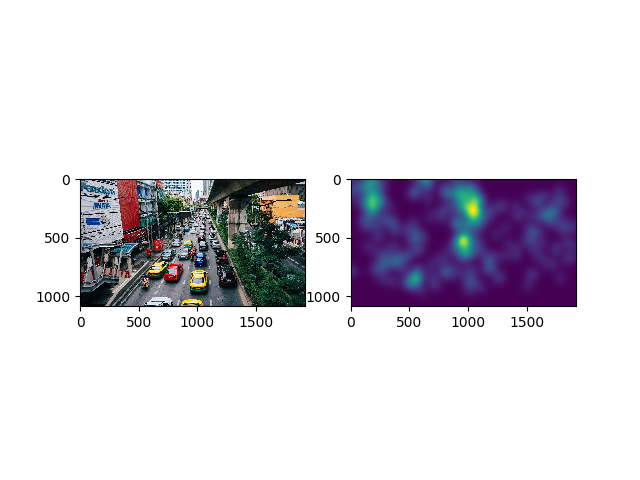

<IPython.core.display.Javascript object>


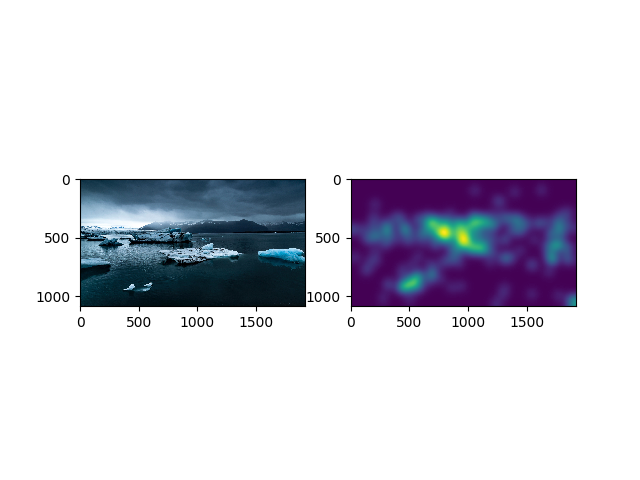

<IPython.core.display.Javascript object>


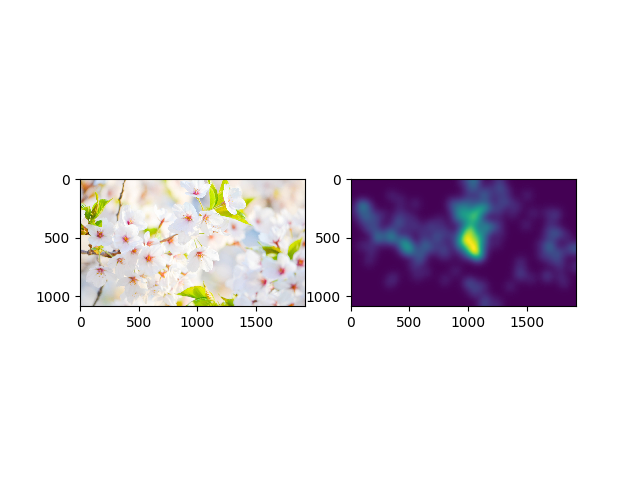

<IPython.core.display.Javascript object>


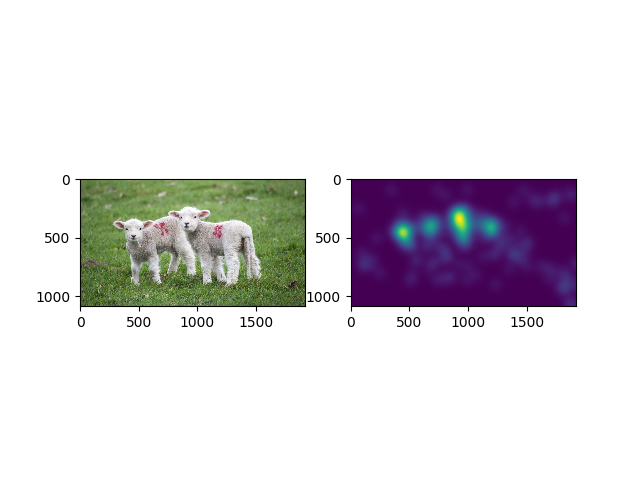

<IPython.core.display.Javascript object>


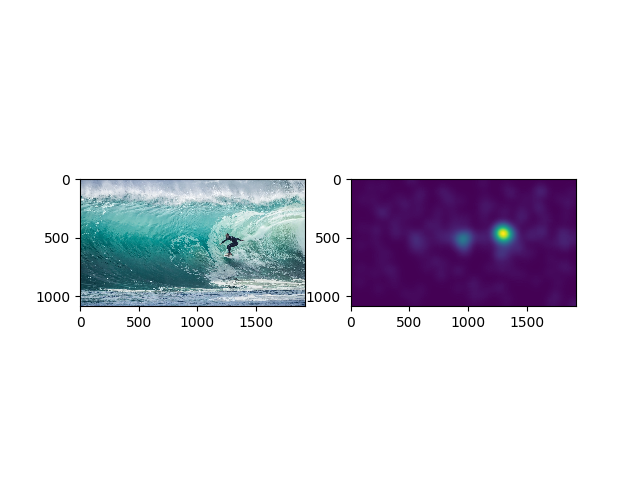

<IPython.core.display.Javascript object>


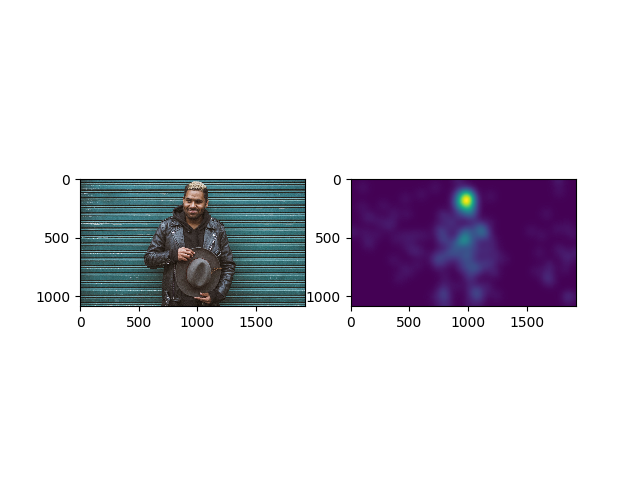

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


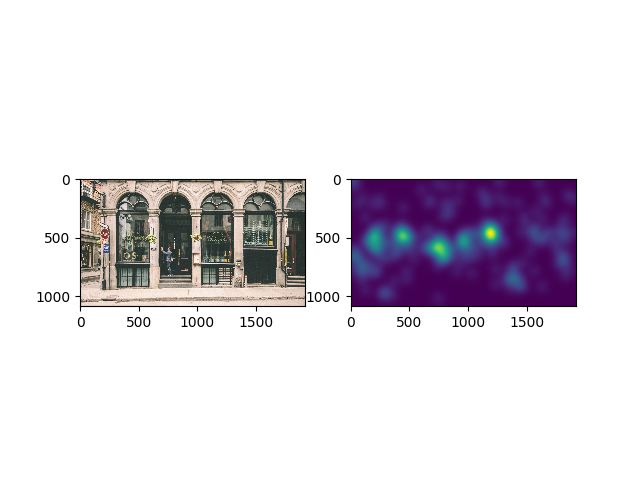

<IPython.core.display.Javascript object>


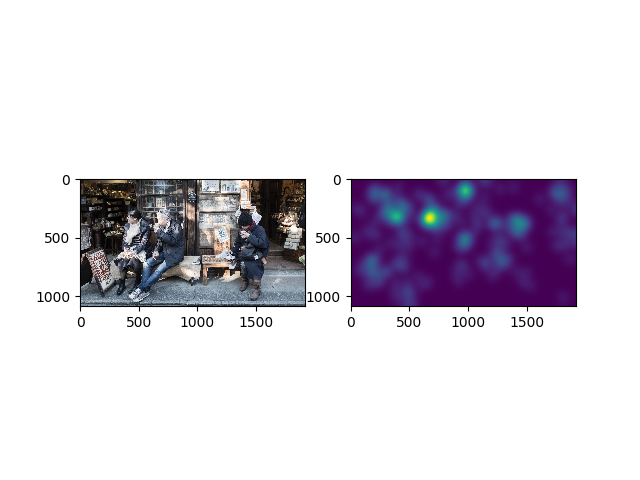

In [3]:
for i in range(1,12):
    img=io.imread("Stimuli/img"+str(i)+".jpg")
    sal=io.imread("GroundTruthMaps/gt_sal"+str(i)+".jpg")
    plt.figure()
    plt.subplot(121) # 121 = 1 ligne, 2 colonnes, 1ère sous figure
    plt.imshow(img)
    plt.subplot(122) # 122 = 1 ligne, 2 colonnes, 2ème sous figure
    plt.imshow(sal)

**Question 2:** Quels sont les éléments / caractéristique d'image qui attirent le regard des observateurs ? Est-ce que ce ces observations confirment vos intutions de la question 1 ?

**Réponse 2:**

## Observation des performance d'un modèle d'attention

Le script ci-dessous liste les différents (anciens) modèles que vous pouvez évaluer.

Le script suivant permet de mesurer la performance d'un modèle d'attention en utilisant un certain nombre de mesures (Corrélation, AUC, etc.).


In [3]:
import os

dirs = os.listdir("SalModelsOutputs")
print("Available models:")
for dir in dirs:
    print("- " + dir)

Available models:
- .DS_Store
- Itti98
- SEE
- LDS
- gbvs_Itti06
- Salicon
- imagesaliency_Zhang08
- center-model
- Achanta_CVPR09
- rare2012
- Achanta_MSSS_ICIP10
- Content-aware_saliency
- SIM
- Wu_Saliency_CVPR11
- FES11
- AIM


Processing...........
Qualitative comparison



<IPython.core.display.Javascript object>


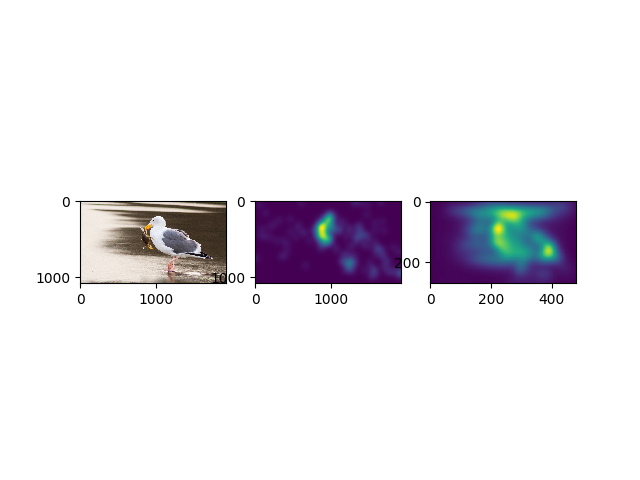

<IPython.core.display.Javascript object>


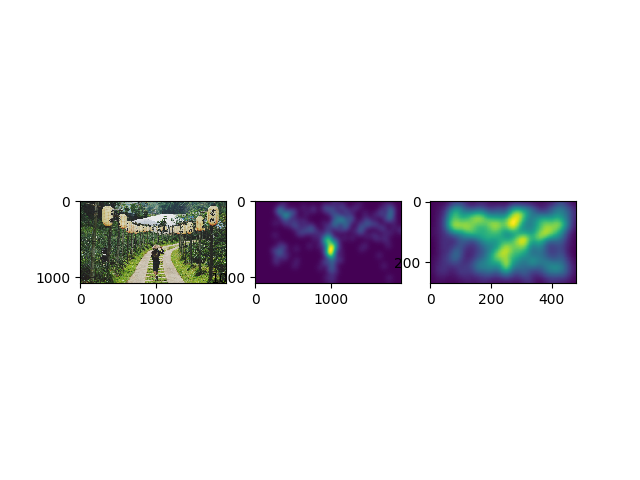

<IPython.core.display.Javascript object>


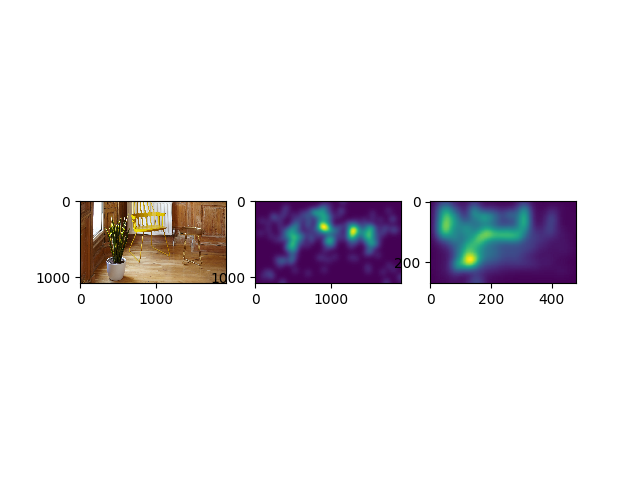

<IPython.core.display.Javascript object>


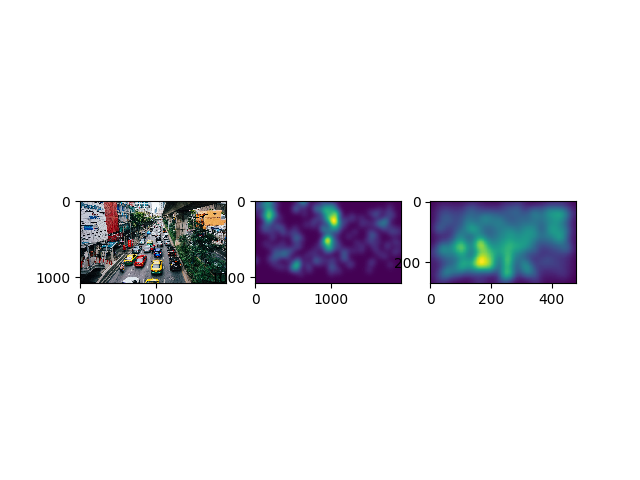

<IPython.core.display.Javascript object>


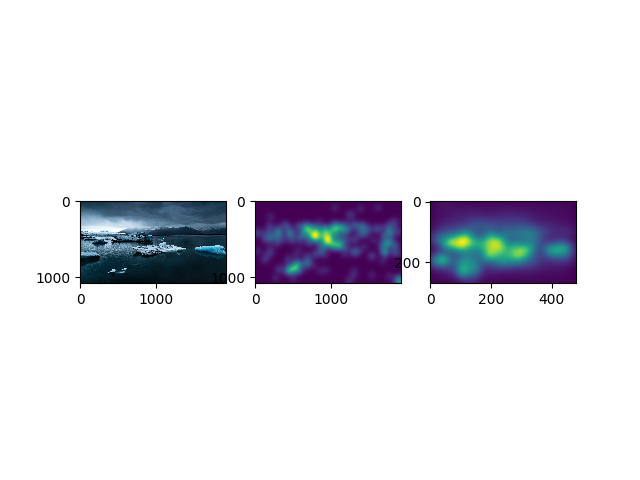

<IPython.core.display.Javascript object>


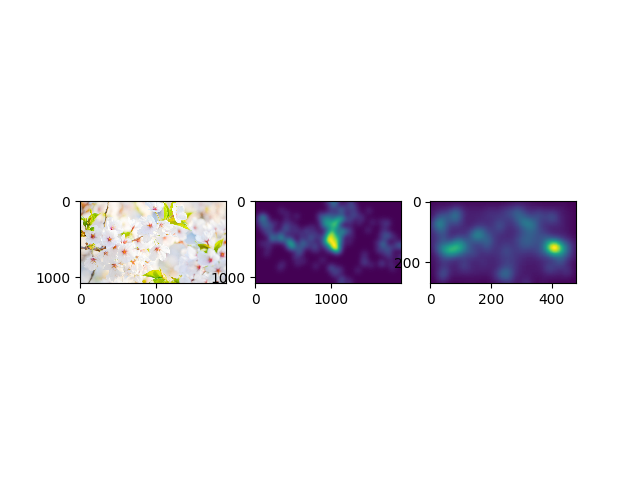

<IPython.core.display.Javascript object>


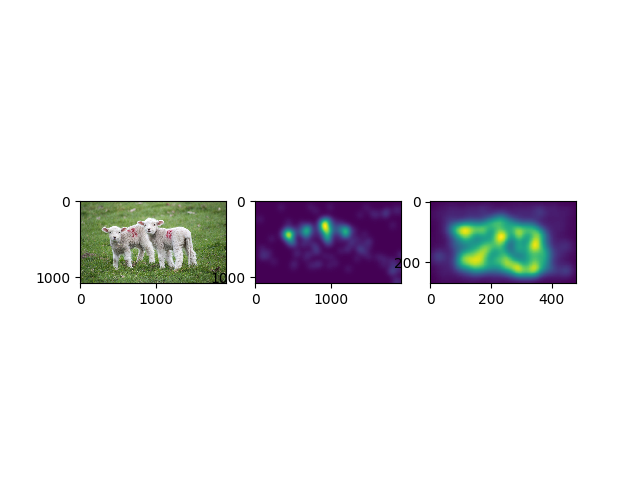

<IPython.core.display.Javascript object>


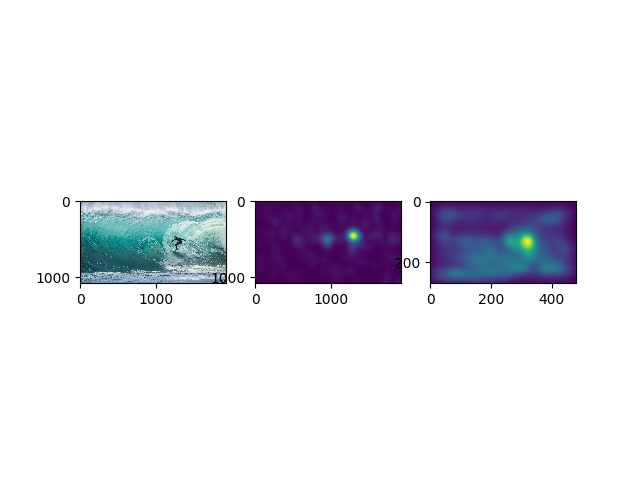

<IPython.core.display.Javascript object>


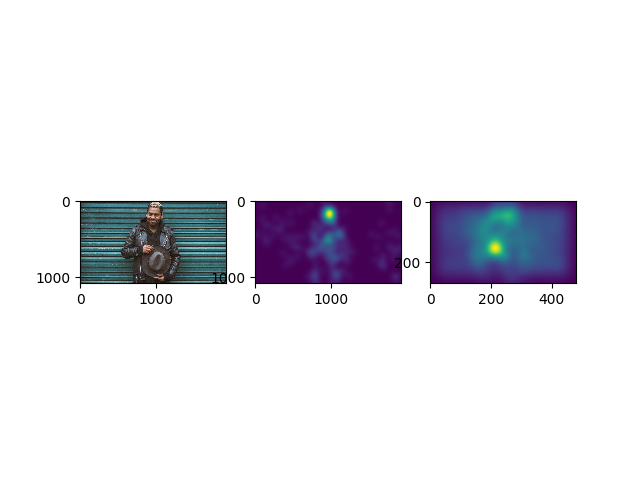

<IPython.core.display.Javascript object>


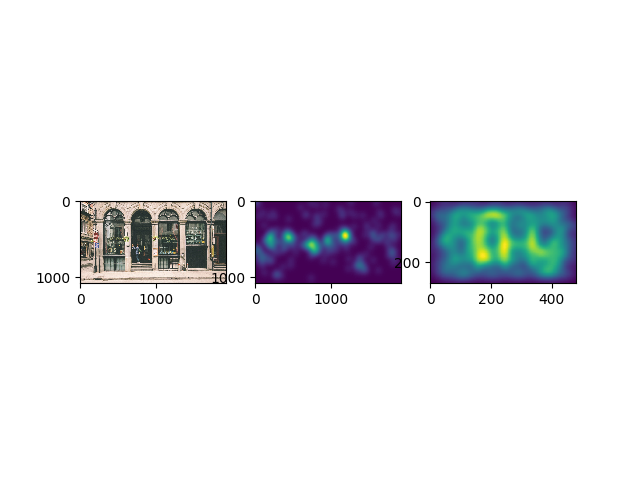

<IPython.core.display.Javascript object>


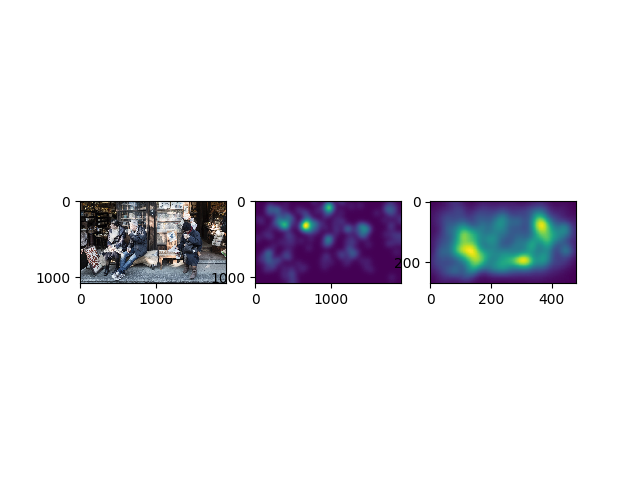


Per image results

AUC_Judd   : [' 0.80', ' 0.76', ' 0.69', ' 0.59', ' 0.72', ' 0.64', ' 0.79', ' 0.68', ' 0.77', ' 0.62', ' 0.56']
AUC_Borji  : [' 0.79', ' 0.75', ' 0.68', ' 0.59', ' 0.71', ' 0.62', ' 0.78', ' 0.68', ' 0.76', ' 0.62', ' 0.55']
NSS        : [' 1.36', ' 0.94', ' 0.59', ' 0.27', ' 0.70', ' 0.33', ' 1.10', ' 0.99', ' 1.19', ' 0.42', ' 0.16']
CC         : [' 0.54', ' 0.54', ' 0.38', ' 0.19', ' 0.46', ' 0.20', ' 0.48', ' 0.42', ' 0.56', ' 0.27', ' 0.11']
SIM        : [' 0.50', ' 0.60', ' 0.55', ' 0.58', ' 0.58', ' 0.54', ' 0.51', ' 0.57', ' 0.55', ' 0.54', ' 0.53']
KLD        : [' 1.21', ' 0.89', ' 0.88', ' 0.78', ' 0.75', ' 1.04', ' 1.06', ' 0.75', ' 1.11', ' 0.87', ' 0.96']

Mean/StdDev

AUC_Judd   : 0.69 / 0.08
AUC_Borji  : 0.68 / 0.08
NSS        : 0.73 / 0.39
CC         : 0.38 / 0.15
SIM        : 0.55 / 0.03
KLD        : 0.94 / 0.15


In [10]:
import numpy as np
import skimage.transform as tr
import sys
from pysaliency.benchmark import metrics

# Please write here the name of the model you want to evaluate
model_name="Itti98"

# {Metric name:
#   func,
#   passes: should we compute 1vs2 and 2vs1 then average?
#   type: requires fixation or saliency maps as comparison
# }
metrics = {
    "AUC_Judd": [metrics.AUC_Judd, 1, 'fix'], # Binary fixation map
    "AUC_Borji": [metrics.AUC_Borji, 1, 'fix'], # Binary fixation map
    "NSS": [metrics.NSS, 1, 'fix'], # Binary fixation map
    "CC": [metrics.CC, 1, 'sal'], # Saliency map
    "SIM": [metrics.SIM, 1, 'sal'], # Saliency map
    "KLD": [metrics.kld, 2, 'sal'] } # Saliency map

M = {m:[] for m in metrics.keys()}

print("Processing",end="")
for im_number in range(1,12):

    print(".",end="")

    # Load fixation and saliency maps from ground truth

    sal_gt = { 
        "fix": np.transpose(np.load("./GroundTruthData/I" + str(im_number) + "_C0.npz")["arr_0"]),
        "sal": np.transpose(np.load("./GroundTruthData/I" + str(im_number) + "_C0_saliency.npz")["arr_0"])
        }

    (height, width) = sal_gt["sal"].shape

    # Load saliency maps from model
    sal_model = io.imread("./SalModelsOutputs/"+ model_name + "/sal_map_img" + str(im_number) + ".jpg" )
    sal_model = tr.resize(sal_model, (height, width))

    # Normalize data and resize models output
    sal_model = np.divide(sal_model, np.sum(sal_model))
    sal_gt["sal"] = np.divide(sal_gt["sal"], np.sum(sal_gt["sal"]))

    for metric in metrics.keys():
        func = metrics[metric]
        if func[1] == 2:
            m  = func[0](sal_model, sal_gt[func[2]])
            m += func[0](sal_gt['sal'], sal_model)
            m /= 2
        else:
            m = func[0](sal_model, sal_gt[func[2]])

        M[metric].append(m)
        
print("\nQualitative comparison\n")
for i in range(1,12):
    img=io.imread("Stimuli/img"+str(i)+".jpg")
    gt=io.imread("GroundTruthMaps/gt_sal"+str(i)+".jpg")
    sal_model = io.imread("./SalModelsOutputs/"+ model_name + "/sal_map_img" + str(i) + ".jpg" )
    plt.figure()
    plt.subplot(131) # 131 = 1 ligne, 3 colonnes, 1ère sous figure
    plt.imshow(img)
    plt.subplot(132) # 132 = 1 ligne, 3 colonnes, 2ème sous figure
    plt.imshow(gt)
    plt.subplot(133) # 133 = 1 ligne, 3 colonnes, 3ème sous figure
    plt.imshow(sal_model)
      
print("\nPer image results\n")
for kk, vv in M.items():
    print("{:10} : {}".format(kk, ["{: .2f}".format(number) for number in vv]))
    
print("\nMean/StdDev\n")
for kk, vv in M.items():
    print("{:10} : {:.2f} / {:.2f}".format(kk,np.mean(vv), np.std(vv)))

Chaque (groupe d') étudiant travaillera sur un modèle particulier. Veuillez adapter la variable `model_name` au nom du modèle que vous étudiez.

**Question 3:** Le modèle a-t-il les mêmes performances sur toutes les images ? Essayez d'expliquer pourquoi le modèle se comporte moins bien dans certaines situations.Quels sont les types / caractéristiques d'images sur lesquel le modèle fonctionne bien (ou mal) ?

**Réponse 3:**

**Question 4:** Les différentes mesures utilisée ont elles des résultats cohérents ? Quelles sont les conséquences pour l'analyse des performances d'un modèle ?

**Réponse 4:**


**Question 5:** Comparez les performances de votre modèle avec celles des autres (étudiés par d'autres étudiants). Certains modèles sont ils plus performants que d'autres ? Lesquels ? Le sont ils sur toutes les images ?

**Réponse 5:**